In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import segyio
import glob
import os

import pyfrac
import obspy
from obspy.core import UTCDateTime

In [38]:
from pyfrac.visualisation.traceviz import wiggleplot, traceimage
from pyfrac.visualisation.eventimages import locimage3d
from pyfrac.processing.filtering import butter_bandpass_filter

# LOAD DATA - SEGD FORMAT :(

In [92]:
data_dir = '/media/birniece/Extreme SSD/UtahFORGE/'
sgd_fname = '20.fcnt'
sgd_path = os.path.join(data_dir,sgd_fname)

In [98]:
ref_time = UTCDateTime("2019-04-21T19:42:54")     # reference time for a detected event

# extract a data segment 0.2 second before and 1.0 second after the reference time
start_time = ref_time - 2.0
end_time   = ref_time + 2.0

In [101]:
nt = 4001
data = np.zeros([21,nt])
for i in range(1,21):
    print(i)
    segment = obspy.read(os.path.join(data_dir,'%i.fcnt'%i), 
                         format='rg16', merge=True, 
                         starttime=start_time, endtime=end_time)
    data[i-1] = segment[0].data

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


(<Figure size 1200x600 with 2 Axes>,
 <Axes: title={'center': 'Seismic Recording'}, xlabel='Receiver #', ylabel='Time'>)

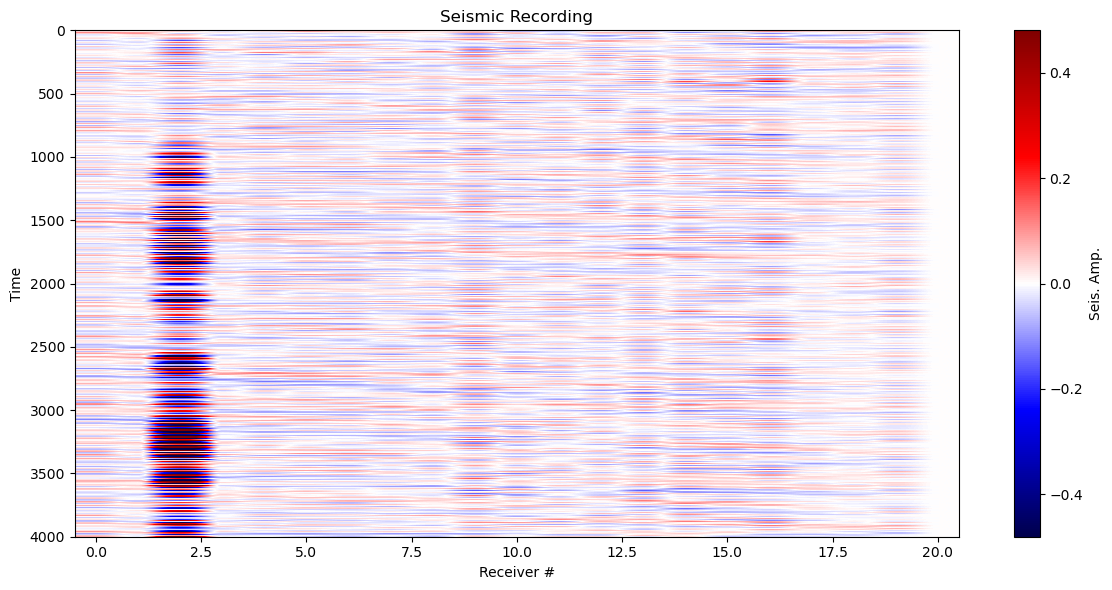

In [104]:
traceimage(data, climQ=99.)

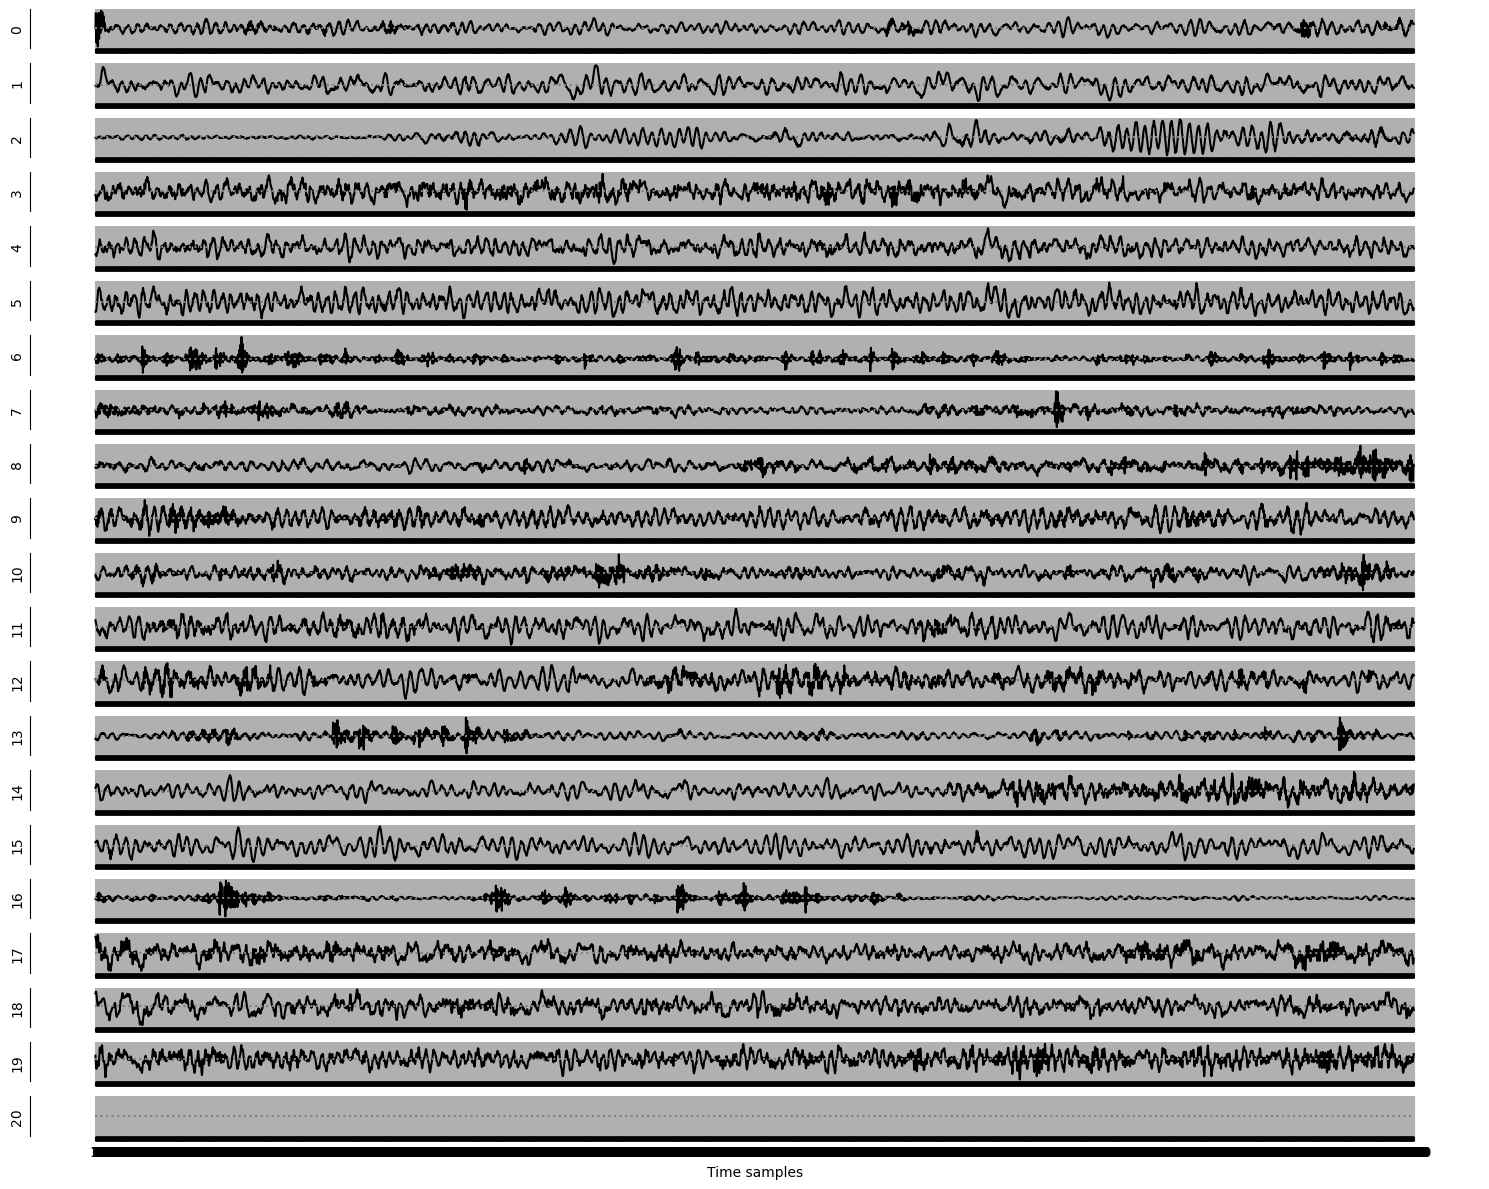

In [106]:
fig,axs=wiggleplot(data,norm_indiv=True,figsize=[15,12])

In [71]:
fs = segment[0].stats['sampling_rate']

1000.0

In [68]:
trace.shape

(4001,)

In [65]:
trace = segment[0].data

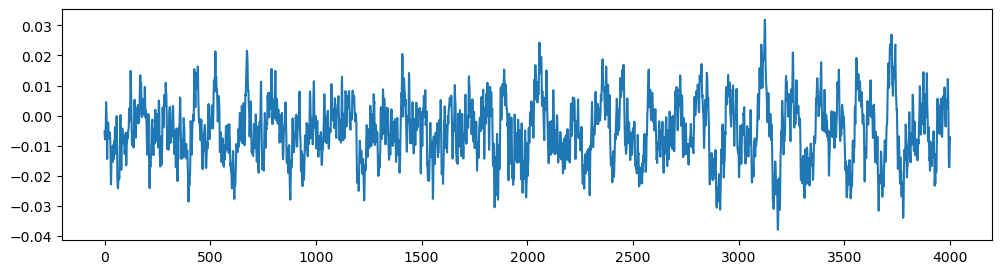

In [66]:
plt.figure(figsize=[12,3])
plt.plot(trace)

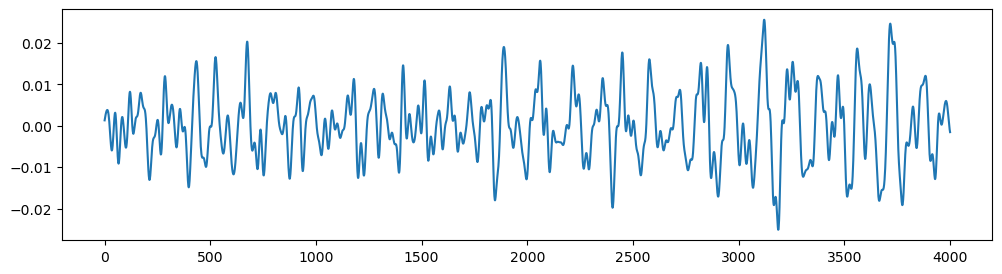

In [67]:
bp_trace = butter_bandpass_filter(trace, lowcut=5, highcut=40, fs=fs)
plt.figure(figsize=[12,3])
plt.plot(bp_trace)

In [7]:

with segyio.open(sgy_path, "r", ignore_geometry=True) as f:
    data = np.array(f.trace)
    print(np.array(f.trace).shape)

(36, 32000)


In [7]:
(data.T/np.max(abs(data),axis=1)).T

array([[-0.12694374, -0.06401794, -0.04113584, ..., -0.02076484,
         0.0307199 ,  0.10508674],
       [-0.08067158,  0.2115175 ,  0.305018  , ...,  0.16323212,
         0.02298135, -0.09389427],
       [-0.12694374, -0.06401794, -0.04113584, ..., -0.02076484,
         0.0307199 ,  0.10508674],
       ...,
       [-0.08067158,  0.2115175 ,  0.305018  , ...,  0.16323212,
         0.02298135, -0.09389427],
       [-0.12694374, -0.06401794, -0.04113584, ..., -0.02076484,
         0.0307199 ,  0.10508674],
       [-0.08067158,  0.2115175 ,  0.305018  , ...,  0.16323212,
         0.02298135, -0.09389427]], dtype=float32)

In [102]:
def traceimage(data, norm_indiv=False, figsize=[12, 6], cbar=True, climQ=90, cmap='seismic'):
    
    if norm_indiv:
        data = (data.T/np.max(abs(data),axis=1)).T        
    clim = np.percentile(abs(data),climQ)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    im = ax.imshow(data.T, aspect='auto', interpolation=None,
                   cmap=cmap, vmin=-1*clim, vmax=clim)
    if cbar: plt.colorbar(im,ax=ax, label='Seis. Amp.')
    ax.set_xlabel('Receiver #')
    ax.set_ylabel('Time')
    ax.set_title('Seismic Recording')
    ax.axis('tight')
    fig.tight_layout()
    
    return fig,ax

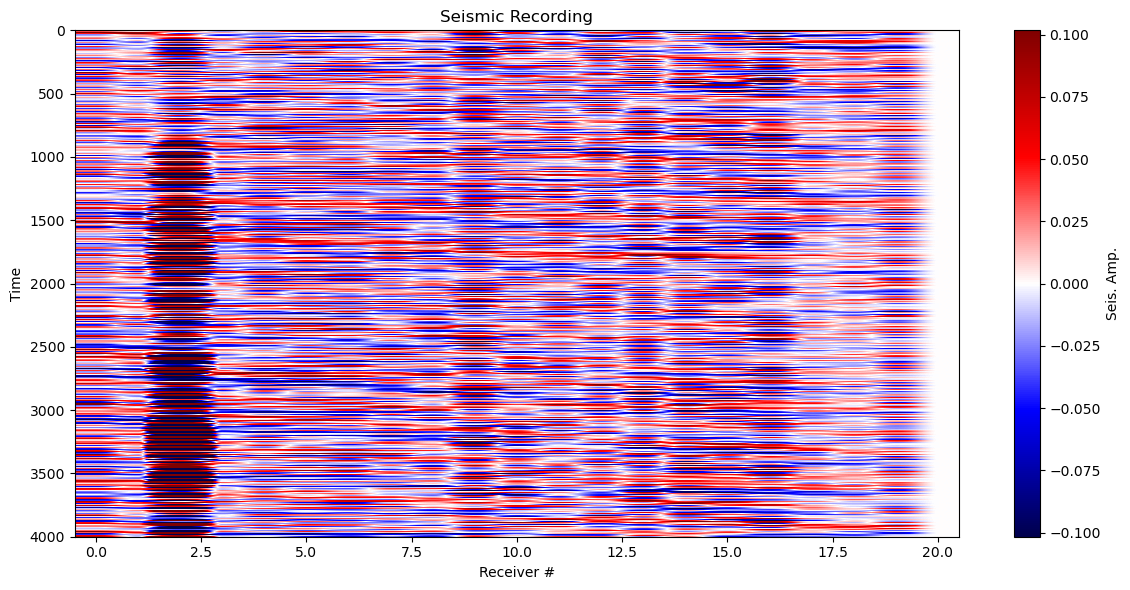

In [103]:
fig,ax = traceimage(data)

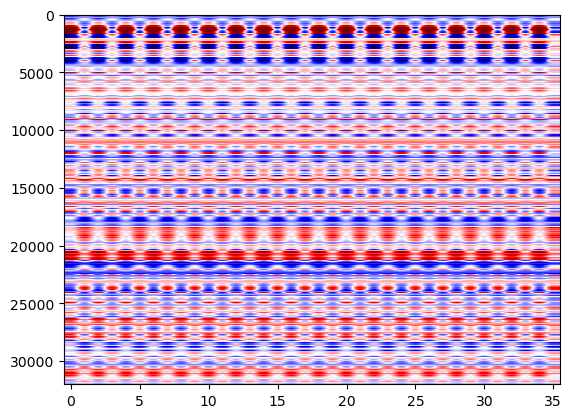

In [11]:
datawin = data[:,:]
plt.imshow(datawin.T,aspect='auto',
           cmap='seismic',vmin=-1*np.percentile(abs(datawin),92),vmax=np.percentile(abs(datawin),92),
          )

In [13]:
def wiggleplot(data,norm_indiv=True,figsize=[12, 6]):
    ntr = np.shape(data)[0]  # num of traces
    fig, axs = plt.subplots(ntr, 1, figsize=figsize)
    for i, ax in enumerate(axs): 
        if norm_indiv:
            ax.plot(data[i]/np.max(abs(data[i])), 'k');
        else:
            ax.plot(data[i], 'k');

    for ax in axs:
        ax.set_xlim([0, len(data[0])]);
        if norm_indiv: ax.set_ylim([-1, 1]);
        ax.set_xticks([]);
        ax.set_yticks([]);
        ax.spines['top'].set_visible(False);
        ax.spines['right'].set_visible(False);
        ax.spines['bottom'].set_visible(False);
        
    return fig,axs

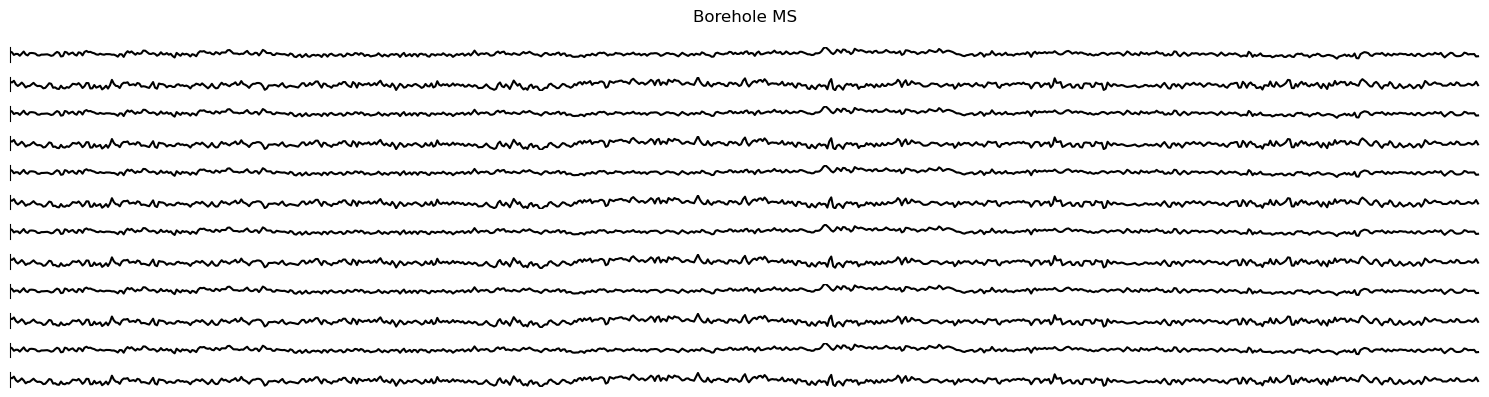

In [14]:
fig,axs=wiggleplot(data[:12,24500:25250],norm_indiv=True,figsize=[15,4])
fig.suptitle('Borehole MS')
fig.tight_layout()

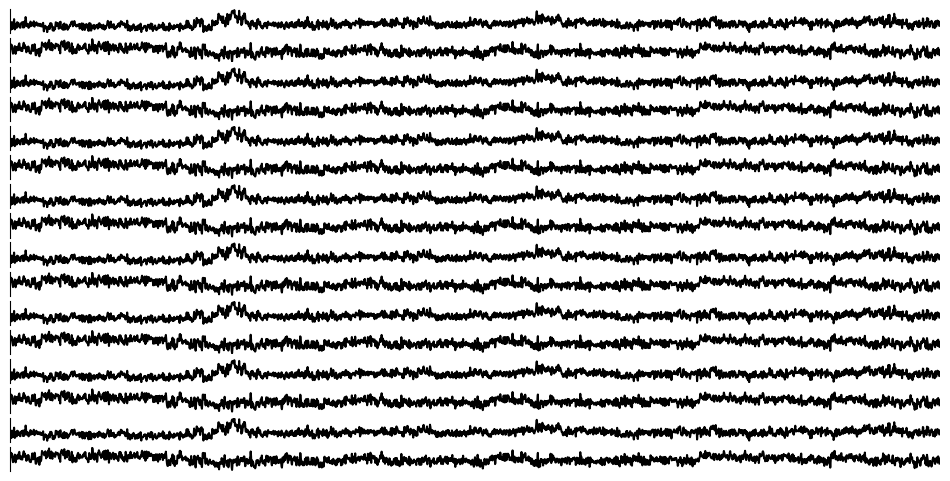

In [15]:
fig,axs = plt.subplots(16,1,figsize=[12,6])
for i,ax in enumerate(axs): ax.plot(data[i,23500:26000],'k')

for ax in axs:
    ax.set_xlim([0,len(data[i,23500:26000])])
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

In [9]:
glob.glob('../../../../MicroseismicModelling/UTAH_FORGE/Apr27_Data/201904272020*')

['../../../../MicroseismicModelling/UTAH_FORGE/Apr27_Data/20190427202013.868.segy',
 '../../../../MicroseismicModelling/UTAH_FORGE/Apr27_Data/20190427202029.868.segy',
 '../../../../MicroseismicModelling/UTAH_FORGE/Apr27_Data/20190427202045.868.segy']

# Velocity Model

In [10]:
velDF = pd.read_csv('/home/birniece/Documents/Projects/MicroseismicModelling/UTAH_FORGE/Microseim_Event_Files/3D_seismic_velocity_model_updated.csv')

velDF.head()

,x (m),y (m),z (m),Vp (km/s),Vp Quality,Vs (km/s),Vs Quality
0,801.0,-1326.0,87.0,5.9,0,3.5,0
1,801.0,-1326.0,88.0,5.9,0,3.5,0
2,801.0,-1326.0,89.0,5.9,0,3.5,0
3,801.0,-1326.0,90.0,5.9,0,3.5,0
4,801.0,-1326.0,91.0,5.9,0,3.5,0


In [11]:
vmod = velDF['Vp (km/s)']

vel_x = velDF['x (m)']
vel_y = velDF['y (m)']
vel_z = velDF['z (m)']